# **Actividad 1**

A continuación se proveen dos datasets del radar RMA1 de Córdoba. Estos corresponden a dos días en los que se registraron ecos de distinta naturaleza. El objetivo de esta actividad es determinar la naturaleza de estos ecos.

Link al dataset 1 https://www.dropbox.com/scl/fi/2odzhj2peu9o3u7ejo4fx/dataset_1.zip?rlkey=il9p6519067ioxhvyujbilfw5&st=o35p7imj&dl=0

Link al dataset 2 https://www.dropbox.com/scl/fi/953m42e3stjz95m9hxz26/dataset_2.zip?rlkey=lxo6qhsfibf297xigfwuiwwk4&st=qyq543d9&dl=0

Para ello puede considerar los siguientes pasos como una guía aunque puede utilizar cualquier herramienta de análisis vista en clase:

1.   Descargue los datos del dataset 1.
2.   Inspeccione qué variables de radar contiene el primer archivo.
3.   Realice gráficos del factor de reflectividad horizontal para todos los archivos del dataset.
4.   Identifique visualmente el eco que vamos a estudiar.
5.   Realice un gráfico de 4 paneles de las variables DBZH, ZDR, RHOHV y KDP para un archivo que ud. considere representativo.
6.   Realice un zoom de estas cuatro variables en la región donde se encuentra el eco a estudiar.
7.   ¿A partir de las variables de radar graficadas logra identificar algún patrón característico en el eco? ¿Puede responder si se trata de un eco meteorológico o no meteorológico?.
8. Repita para el dataset 2.



In [ ]:
# Instalamos arm_pyart y cartopy
!pip install cartopy
!pip install arm_pyart

In [ ]:
# Importamos librerias necesarias para trabajar
import pyart                                                                # Libreria para trabajar con datos de radar PyART
import glob                                                                 # Expansión del patrón de nombres de ruta de estilo Unix (glob)
import matplotlib.pyplot as plt                                             # Libreria para graficar matplotlib
import cartopy.crs as ccrs                                                  # Libreria para graficar mapas georeferenciados (cartopy)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import os                                                                   # Interfaces misceláneas del sistema operativo (os)
import sys                                                                  # Parámetros y funciones específicos del sistema (sys)
import numpy as np                                                          # cálculo numérico y el análisis de datos (numpy)
import warnings                                                             # Control de advertencias (warnings e ignore warnings)
warnings.filterwarnings('ignore')

Completar

In [ ]:
# Descargamos el modulo colores.py
!wget -O colores.py https://www.dropbox.com/scl/fi/x7rcbt2isepyoqkrvy7hb/colores.py?rlkey=endt973hpzggeadox6jzfmxyp&st=slva4n5p&dl=0
print('\n')

# Descargamos el modulo funciones_radar.py
!wget -O funciones_radar.py https://www.dropbox.com/scl/fi/dj1nsqbefb54toxotwp6j/funciones_radar.py?rlkey=hgh6ewv6bmtvs3a85r71hyrtc&st=f7h3jpry&dl=0
print('\n')

# Descargamos algunos datos de radar para trabajar
!wget -O Datos_Radar.zip

print('\n')

# Descargamos shapefiles con los límites departamentales de Córdoba
!wget -O Shapes.zip https://www.dropbox.com/scl/fi/695odexr63ta88u4d896w/Shapes.zip?rlkey=wubfxltipp4ivmh0mawq7e462&st=uviug56h&dl=0

Descomprimimos los .zip descargados anteriormente

In [ ]:
# unzip es la herramienta para descomprimir, -f permite forzar la escritura si el directorio existe
!rm -r Shapes && rm -r Datos_Radar # intentamos borrar directorios si es que existen
!unzip Shapes.zip
!unzip Datos_Radar.zip

Indicamos al código donde están guardados los volumenes de radar

In [ ]:
# Listamos todos los archivos en el directorio y los guardamos en una lista
lista_de_archivos = sorted(glob.glob('./Datos_Radar/*.nc'))
lista_de_archivos

Lectura de un volumen de radar con la función pyart.io.read

Completar

In [ ]:
# Documentación: https://arm-doe.github.io/pyart/API/generated/pyart.io.read.html
# Linea para la apertura del archivo o volumen de radar
radar = pyart.io.read(lista_de_archivos[])

Completar

In [ ]:
# info del volumen de radar


In [ ]:
# Visualizamos las variables disponibles en el volumen de radar (keys)


Importamos mapa de colores

In [ ]:
# Importamos mapa de colores personalizados diseñados por el Grupo Radar Córdoba (@GrupoRadarCBA en Twitter/X)
# Si los archivos están en nuestro drive ejecutar esta parte para indicarle a python donde encontrar el modulo colores.py

# *************************************************************
# py_file_location = "/content/drive/MyDrive/Curso-Radar"
# sys.path.append(os.path.abspath(py_file_location))
# *************************************************************

# Colormaps del GRC
import colores

Gráfico simple del factor de reflectividad DBZH

Completar las variables field (variable de radar) y sweep (elevación) a graficar

In [ ]:
contador = 0

# Indicar en donde están nuestros shapefiles
# path_shapes = '/content/drive/MyDrive/Curso-Radar/Shapes/cba_deptos.shp'
path_shapes = './Shapes/cba_deptos.shp'

shapes_kwargs = {'zorder':1,'facecolor':'None', 'edgecolor':'black', 'alpha':1,'lw':.5}
projection = ccrs.Mercator() #PlateCarree

# Limpiamos el directorio por si llega a haber figuras de ejecuciones anteriores
!rm *.png

for filename in lista_de_archivos:
  # Comando de lectura
  radar = pyart.io.read(filename)
  # Creamos objeto figura y le asignamos un tamaño
  fig = plt.figure(figsize=(15,10))
  # Creamos un objeto display con los datos del volumen
  display = pyart.graph.RadarMapDisplay(radar)

  # Definimos la proyección con la que vamos a graficar
  projection = ccrs.Mercator() #PlateCarree

  # Grafico de DBZH
  ax1 = plt.subplot(1, 1, 1, projection=projection)
  display.plot_ppi_map(field='', sweep=, vmin = -30, vmax = 70,
                      cmap='grc_th', ax=ax1,
                      projection=projection,
                      shapefile=path_shapes,
                      shapefile_kwargs=shapes_kwargs,
                      lat_lines=[-30,-30.5,-31,-31.5,-32,-32.5,-33],
                      lon_lines=[-62,-62.5,-63,-63.5,-64,-64.5,-65,-65.5,-66])
  # Guardamos la figura
  plt.savefig('figura_'+str(contador)+'.png', bbox_inches='tight', dpi=100)
  plt.show()

  contador = contador + 1

Animación

In [ ]:
# Creamos una lista vacia para guardar nuestras figuras
lista_figuras = []
# Listamos todos los archivos en el directorio temporal de colab
lista_archivos = os.listdir()
# Iteramos por cada archivo y verificamos que termine en .png
for archivo in lista_archivos:
  if archivo.split('.')[-1] == 'png':
    lista_figuras.append(archivo)

# Ordenamos la lista
lista_figuras.sort()
lista_figuras

In [ ]:
# Extraido del repositorio de Diego Souza (https://github.com/diegormsouza)
# Interfaz de Python para leer y escribir imagenes
import imageio.v2 as imageio
from IPython.display import Image

# Creamos el .GIF
images = []
for figura in lista_figuras:
    images.append(imageio.imread(figura))
imageio.mimsave('animacion.gif', images, fps=1)

In [ ]:
# Abrimos el .GIF
Image(open('animacion.gif','rb').read())

Gráfico de DBZH, ZDR, RHOHV y KDP\
Seleccione un archivo representativo y complete

In [ ]:
radar = pyart.io.read(lista_de_archivos[])

##########################################################################################################################
##########################################################################################################################
# Elevacion de la antena que queremos graficar
elevacion = 0

# Configuramos ventana de visualizacion
min_lon=-66.9
max_lon=-61.5
min_lat=-33.7
max_lat=-29.2

##########################################################################################################################
##########################################################################################################################

fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(radar)

fig.patch.set_visible(False)

# Indicar en donde están nuestros shapefiles
# path_shapes = '/content/drive/MyDrive/Curso-Radar/Shapes/cba_deptos.shp'
path_shapes = './Shapes/cba_deptos.shp'

shapes_kwargs = {'zorder':1,'facecolor':'None', 'edgecolor':'black', 'alpha':1,'lw':.5}
projection = ccrs.Mercator() #PlateCarree

# Grafico de DBZH
         #(filas, columnas, elemento)
ax1 = plt.subplot(2, 2, 1, projection=projection)
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# display.plot_point(-63.571418834631224, -32.04548956046992, '.', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de ZDR
ax2 = plt.subplot(2, 2, 2, projection=projection)
display.plot_ppi_map('ZDR', elevacion, vmin = -5, vmax = 10.5, cmap='grc_zdr', ax=ax2,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de RHOHV
ax3 = plt.subplot(2, 2, 3, projection=projection)
display.plot_ppi_map('RHOHV', elevacion, vmin = 0.5, vmax = 1, cmap='grc_rho', ax=ax3,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de KDP
ax4 = plt.subplot(2, 2, 4, projection=projection)
display.plot_ppi_map('KDP', elevacion, vmin = 0, vmax = 8, cmap='grc_rain', fig=fig, ax=ax4,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Curso_Radar_UNC-FaMAF/PPIx4.png', dpi=150, transparent=False)
plt.show()

## **Aplicación de filtros basados en RHOHV a la variable DBZH**
Intentaremos graficar sólo aquellos valores de DBZH asociados a RHOHV mayores a un dado umbral

Documentación: https://arm-doe.github.io/pyart/API/generated/pyart.filters.GateFilter.html

In [ ]:
##########################################################################################################################
##########################################################################################################################
# Elevacion de la antena que queremos graficar
elevacion = 0

# Configuramos ventana de visualizacion
min_lon=-66.9
max_lon=-61.5
min_lat=-33.7
max_lat=-29.2

# Filtro. Extraido de las notebooks de Ignacio Montamat (Grupo Radar Córdoba).
gf = pyart.correct.GateFilter(radar)
gf.exclude_below('RHOHV', 0.92)

##########################################################################################################################
##########################################################################################################################

fig = plt.figure(figsize=(16,4))
display = pyart.graph.RadarMapDisplay(radar)

fig.patch.set_visible(False)

# Indicar en donde están nuestros shapefiles
# path_shapes = '/content/drive/MyDrive/Curso-Radar/Shapes/cba_deptos.shp'
path_shapes = './Shapes/cba_deptos.shp'

shapes_kwargs = {'zorder':1,'facecolor':'None', 'edgecolor':'black', 'alpha':1,'lw':.5}
projection = ccrs.Mercator() #PlateCarree

# Grafico de DBZH sin filtrar
         #(filas, columnas, elemento)
ax1 = plt.subplot(1, 3, 1, projection=projection)
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                     title='DBZH SIN FILTRAR')
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# display.plot_point(-63.571418834631224, -32.04548956046992, '.', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de DBZH filtrado
         #(filas, columnas, elemento)
ax1 = plt.subplot(1, 3, 2, projection=projection)
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat, gatefilter=gf,
                     title='DBZH FILTRADO')
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# display.plot_point(-63.571418834631224, -32.04548956046992, '.', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de RHOHV
ax2 = plt.subplot(1, 3, 3, projection=projection)
display.plot_ppi_map('RHOHV', elevacion, vmin = 0.5, vmax = 1, cmap='grc_rho', ax=ax2,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
                     title='RHOHV')
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Curso_Radar_UNC-FaMAF/PPIx4.png', dpi=150, transparent=False)
plt.show()

## **Grafico de un corte pseudo radial**

Documentación: https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.util.cross_section_ppi.html

In [ ]:
##########################################################################################################################
##########################################################################################################################

# Definimos el radial de interés (de 0 a 360 grados contando desde el norte en sentido horario)
radial = 90

# Definimos la elevación de antena que queremos graficar
elevacion = 0

# Configuramos limites distancia al radar (xlim) y altura (ylim) en km
xlim = [25,150]
ylim = [0,15]

##########################################################################################################################
##########################################################################################################################
# Indicar en donde están nuestros shapefiles
# path_shapes = '/content/drive/MyDrive/Curso-Radar/Shapes/cba_deptos.shp'
path_shapes = './Shapes/cba_deptos.shp'

projection = ccrs.Mercator() #PlateCarree

# Extraido de las notebooks de Maite Cancelada (UBA-DCAO)
# Extraemos la información necesaria para graficar una línea radial sobre el PPI
indice_inicial = radar.sweep_start_ray_index['data'][elevacion]
indice_final   = radar.sweep_end_ray_index['data'][elevacion]
# Extraemos los azimuths para la elevación indicada (p ej. para elevacion 0 devuelve 0,1,...,358,359)
azimuths = radar.azimuth['data'][indice_inicial:indice_final]
# Buscamos el índice del azimuth más cercano al radial requerido
indice_aximuth = np.argmin(np.abs(azimuths-radial))
# Extraemos las latitudes y longitudes de los puntos
lat_azimuth, lon_azimuth, altitud = radar.get_gate_lat_lon_alt(elevacion)

# Abrimos una nueva figura
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 1, 1, projection=projection)

display = pyart.graph.RadarMapDisplay(radar)
# Graficamos el PPI
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', projection=projection, ax=ax1, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0], lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes, shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5}
                     )
# Graficamos una línea en el radial indicado
display.plot_line_geo(lon_azimuth[indice_aximuth,:], lat_azimuth[indice_aximuth,:], 'k--', lw=2)
# Graficamos un punto en la ubicación del radar
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'r*', 'RMA-1',ms=15)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')
################################################################################################

# Se realiza grafico del radial
xsect = pyart.util.cross_section_ppi(radar, [radial])

display = pyart.graph.RadarDisplay(xsect)

fig = plt.figure(figsize=[15,3.5])

ax2 = plt.subplot(1, 1, 1)
display.plot('DBZH', 0, vmin=-30, vmax=70, cmap='grc_th', ax=ax2)
display.set_limits(xlim=xlim, ylim=ylim)
plt.xlabel('Distancia al radar (km)', fontsize=14)
plt.ylabel('Altura (km)', fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

## **Animación a partir del corte radial**

In [ ]:
##########################################################################################################################
##########################################################################################################################

# Definimos el radial de interés (de 0 a 360 grados contando desde el norte en sentido horario)
radial = 90

# Definimos la elevación de antena que queremos graficar
elevacion = 0

# Configuramos limites distancia al radar (xlim) y altura (ylim) en km
xlim = [25,150]
ylim = [0,15]

##########################################################################################################################
##########################################################################################################################

# Limpiamos el directorio por si llega a haber figuras de ejecuciones anteriores
!rm *.png

projection = ccrs.Mercator() #PlateCarree

contador = 0
for filename in lista_de_archivos:

  # Comando de lectura
  radar = pyart.io.read(filename)
  # Se realiza grafico del radial
  xsect = pyart.util.cross_section_ppi(radar, [radial])

  display = pyart.graph.RadarDisplay(xsect)

  fig = plt.figure(figsize=[15,3.5])

  ax2 = plt.subplot(1, 1, 1)
  display.plot('DBZH', 0, vmin=-30, vmax=70, cmap='grc_th', ax=ax2)
  display.set_limits(xlim=xlim, ylim=ylim)
  plt.xlabel('Distancia al radar (km)', fontsize=14)
  plt.ylabel('Altura (km)', fontsize=14)
  plt.grid()
  # Guardamos la figura
  plt.savefig('figura_'+str(contador)+'.png', bbox_inches='tight', dpi=100)

  contador = contador + 1

In [ ]:
# creamos una lista vacia para guardar nuestras figuras
lista_figuras = []
# listamos todos los archivos en el directorio temporal de colab
lista_archivos = os.listdir()
# iteramos por cada archivo y verificamos que termine en .png
for archivo in lista_archivos:
  if archivo.split('.')[-1] == 'png':
    lista_figuras.append(archivo)

# ordenamos la lista
lista_figuras.sort()
lista_figuras

In [ ]:
# Interfaz de Python para leer y escribir imagenes
import imageio.v2 as imageio
from IPython.display import Image

# Creamos el .GIF
images = []
for figura in lista_figuras:
    images.append(imageio.imread(figura))
imageio.mimsave('animacion.gif', images, fps=1)

In [ ]:
# Abrimos el .GIF
Image(open('animacion.gif','rb').read())

## **Grafico de 3 paneles con los cortes latitudinal y longitudinal del volumen de radar**

Es necesario crear una grilla para poder realizar estos cortes.

Documentación: https://arm-doe.github.io/pyart/examples/plotting/plot_three_panel_gridmapdisplay.html

In [ ]:
# Comando de lectura
radar = pyart.io.read(lista_de_archivos[0])

# Creamos un filtro
gf = pyart.correct.GateFilter(radar)
gf.exclude_below('RHOHV', 0.9)

# Definimos la proyección con la que vamos a graficar
projection = ccrs.Mercator() #PlateCarree
# Definimos los limites de nuestra grilla en las 3 dimensiones (x,y,z)
z_grid_limits = (500,15e3)
y_grid_limits = (-200e3,200e3)
x_grid_limits = (-200e3,200e3)
# Definimos una resolución. A mayor resolución más lento va a ser el procesamiento de la grilla.
grid_resolution = 1000
# Definimos una función que nos calcule el numéro de puntos en las 3 dimensiones
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)
# Aplicamos la función anterior y calculamos el numero de puntos en cada dirección
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)
# Creamos la grilla
grid = pyart.map.grid_from_radars(radar, grid_shape=(z_grid_points,y_grid_points, x_grid_points),
                                         grid_limits=(z_grid_limits,y_grid_limits,x_grid_limits), gatefilters=gf)

In [ ]:
# Parámetros configurables, min y max de la escala de colores, y coordenadas donde queremos realizar el corte
vmin = -30
vmax = 70
lat = -31.441
lon = -63.065

field = 'DBZH'

# Creamos objeto display a partir de la grilla anterior
display = pyart.graph.GridMapDisplay(grid)
# Creamos objeto figura
fig = plt.figure(figsize=[15, 7])
# Definimos los tamaños y ubicaciones de los gráficos
map_panel_axes = [0.05, 0.05, 0.4, 0.80]
x_cut_panel_axes = [0.55, 0.10, 0.4, 0.25]
y_cut_panel_axes = [0.55, 0.50, 0.4, 0.25]

# Panel 1: Gráfico PPI
ax1 = fig.add_axes(map_panel_axes, projection=projection)
display.plot_grid(field, 2, vmin=vmin, vmax=vmax, ax=ax1, projection=projection, cmap="grc_th")
display.plot_crosshairs(lon=lon, lat=lat)

# Panel 2: Corte longitudinal
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice(field, lon=lon, lat=lat, ax=ax2, vmin=vmin, vmax=vmax, cmap="grc_th")
# Límites x e y del corte
ax2.set_ylim([0, 15])
ax2.set_xlim([-200, 200])

# Panel 3: Corte latitudinal
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice(field, lon=lon, lat=lat, ax=ax3, vmin=vmin, vmax=vmax, cmap="grc_th")
# Límites x e y del corte
ax3.set_ylim([0, 15])
ax3.set_xlim([-200, 200])

plt.tight_layout()
plt.show()

## **Grafico CAPPI máximo**
Este gráfico nos da información del máximo en las tres direcciones x, y, z de la grilla.

*CAPPI = Constant Altitude Plan Position Indicator, en español Indicador de Plan de Posición de Constante Altitud.*

Documentación: https://arm-doe.github.io/pyart/examples/plotting/plot_max_cappi.html

In [ ]:
display.plot_maxcappi(field='DBZH', range_rings=True, add_slogan=True, cmap="grc_th",
                      vmin=vmin, vmax=vmax, projection=projection)

## **Calculo del valor de una variable de radar sobre un punto en particular**


In [ ]:
# Funciones especificas para trabajar con datos de radar (funciones_radar.py debe estar en el mismo directorio que colores.py)
# de lo contrario debe especificarse el directorio
from funciones_radar import *

Usaremos la función:

**get_nearest_gate_azimuth(radar, longitud, latitud, verbose=False)**

donde radar es el volumen de **radar** (obj), **longitud** (float) y **latitud** (float) son las coordenadas geográficas de la ubicación que queremos extrear (en grados decimales) y **verbose** (bool) es un argumento que nos permite ver con mayor detalle los cálculos realizados por la función (es recomendable ponerlo en True y verificar los resultados).

Esta función nos retorna el **numero de gate** (int) y el **ángulo azimutal** (float) para las coordenadas solicitadas.

Por ejemplo, si quisieramos extraer el valor de factor de reflectividad sobre la localidad de **Río Primero**, cuyas coordenadas geográficas son:

**lat = -31.331574**

**lon = -63.624216**

In [ ]:
gate, alfa = get_nearest_gate_azimuth(radar, -63.624216, -31.331574, verbose=True)
print('\nSalida función: ',gate, alfa)

El numero de gate correspondientes es 118 y el ángulo azimutal es 77 grados

Extraemos el valor de las variables de radar sobre esa ubicación:

In [ ]:
radar.fields['DBZH']['data'][alfa,gate]

In [ ]:
radar.fields['RHOHV']['data'][alfa,gate]

Verificamos que el resultado este bien:

In [ ]:
# Creamos objeto figura y le asignamos un tamaño
fig = plt.figure(figsize=(15,10))
# Creamos un objeto display con los datos del volumen
display = pyart.graph.RadarMapDisplay(radar)

# Definimos la proyección con la que vamos a graficar
projection = ccrs.Mercator() # PlateCarree

# Grafico de DBZH
ax1 = plt.subplot(1,1,1, projection=projection)
display.plot_ppi_map(field='DBZH', sweep=0, vmin=-30, vmax=70,
                     cmap='grc_th', ax=ax1,
                     projection=projection,
                     lat_lines=[-30,-31,-32,-33],
                     lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes,
                     shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5})

# Graficamos un punto de referencia en el mapa
display.plot_point(-63.624216, -31.331574, 'o', color='black')

**Hacemos zoom para ver mejor:**

In [ ]:
# Región donde queremos hacer el zoom
# Latitud minima y máxima
min_lat=-31.5
max_lat=-31.2
# Longitud minima y máxima
min_lon=-63.8
max_lon=-63.5

# Creamos objeto figura y le asignamos un tamaño
fig = plt.figure(figsize=(15,10))
# Creamos un objeto display con los datos del volumen
display = pyart.graph.RadarMapDisplay(radar)

# Definimos la proyección con la que vamos a graficar
projection = ccrs.Mercator() # PlateCarree

# Grafico de DBZH
ax1 = plt.subplot(1,1,1, projection=projection)
display.plot_ppi_map(field='DBZH', sweep=0, vmin=-30, vmax=70,
                     cmap='grc_th', ax=ax1,
                     projection=projection,
                     lat_lines=[-30,-31,-32,-33],
                     lon_lines=[-62,-63,-64,-65,-66],
                     min_lon=min_lon, max_lon=max_lon,
                     min_lat=min_lat, max_lat=max_lat,
                     shapefile=path_shapes,
                     shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5})

# Graficamos un punto de referencia en el mapa
display.plot_point(-63.624216, -31.331574, 'o',
                   markerfacecolor="None",
                   markeredgecolor='black',
                   ms=15)

## **La estimación de lluvia más común y básica se hace a través de relaciones Z-R. Este tipo de relaciones transforman el factor de reflectividad a tasa de precipitación.**


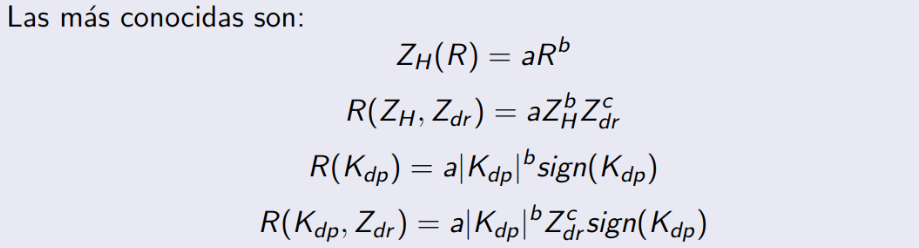

Battan en 1973 presentó una lista de 69 relaciones Z-R y Raghavan en 2013 otras 30.

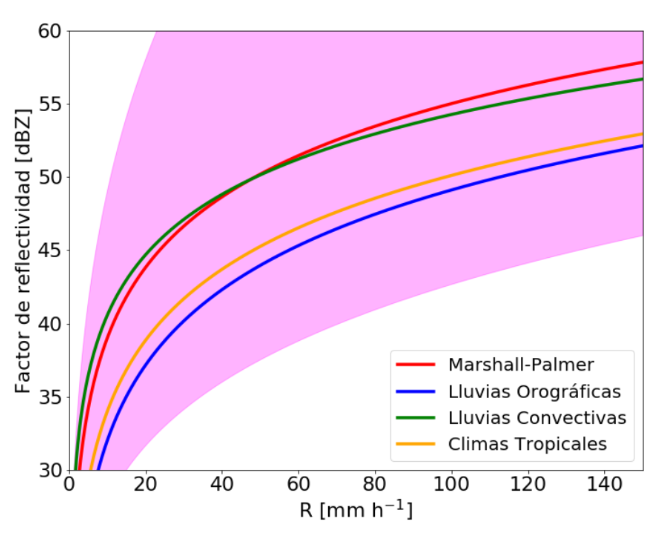

## **Calculo de un estimativo de la tasa de precipitación a partir del factor de reflectividad horizontal utilizando una relación de <font color='red'>Z-R</font> de Marshall y Palmer <font color='green'>$Z=200R^{1.6}$</font>**

### Nota: Z está en unidades lineales:
### $Z[dBZ] = log_{10}(Z[\frac{mm^{6}}{m^{3}}])$
### $Z[\frac{mm^{6}}{m^{3}}] = 10^{\frac{Z[dBZ]}{10}}$

In [ ]:
##########################################################################################################################
##########################################################################################################################
# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.9
# Elevación que queremos graficar (0 para elevacion mas baja)
elevacion = 1

# Configuramos ventana de visualizacion
min_lon=-65.5 # lado oeste
max_lon=-62.9 # lado este
min_lat=-32.6 # lado sur
max_lat=-30.3 # lado norte

# min_lon=-63.6
# max_lon=-62.9
# min_lat=-31.6
# max_lat=-30.9
##########################################################################################################################
##########################################################################################################################
# Maxima precipitación para la escala de colores
max_precip = 150

# Enmascaramos aquellos ecos no meteorologicos
filtered_field = np.ma.masked_where(radar.fields['RHOHV']['data'] < rho_lim, radar.fields['DBZH']['data'] )
# Pasamos el factor de reflectividad de dBZ a unidades lineales mm**6/m**3
linear_filtered_field = 10**(filtered_field/10)
# Calculamos la precipitación a traves de nuestra relación Z-R
precip_field = (linear_filtered_field/200)**(1/1.6)
# La agregamos al volumen como un campo mas
radar.add_field_like('DBZH', 'PRECIP', precip_field, replace_existing=True)
# Le declaramos las unidades
radar.fields['PRECIP']['units'] = 'mm/h'

# Creamos figura y objeto display
fig = plt.figure(figsize=[14,6])
display = pyart.graph.RadarMapDisplay(radar)

projection = ccrs.Mercator() #PlateCarree

# Grafico de DBZH

# ax1 = plt.subplot(1, 2, 1, projection=projection)
# display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
#                      projection=projection)

ax1 = plt.subplot(1, 2, 1, projection=projection)
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([120, 240], ax=None, lw=1)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)

# Grafico de la PRECIPITACION

# ax2 = plt.subplot(1, 2, 2, projection = projection)
# display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = 50,
#                      cmap = 'grc_rain', ax=ax2,
#                      ticks=np.linspace(0,50,11), projection = projection,
#                      colorbar_flag=True, colorbar_label = 'mm/h')

ax2 = plt.subplot(1, 2, 2, projection = projection)
display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = max_precip, cmap = 'grc_rain', ax=ax2,
                     ticks=np.linspace(0,max_precip,11), projection = projection, lat_0 = radar.latitude['data'][0],
                     lon_0 = radar.longitude['data'][0],
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     colorbar_flag=True, colorbar_label = 'mm/h', lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([120], ax=None, lw=1)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1', color='black', ms=12)

plt.tight_layout()
plt.show()

## **Estimación de la precipitación acumulada durante el evento**



In [ ]:
##########################################################################################################################
##########################################################################################################################

# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.9

# Elevación que queremos graficar (0 para elevacion mas baja)
elevacion = 1

##########################################################################################################################
##########################################################################################################################
# Maxima precipitación para la escala de colores
max_precip = 35

# Delta t para el cual se transforma tasa de precipitacion a precipitacion acumulada
delta_t = 10    # En minutos
projection = ccrs.Mercator() #PlateCarree

# Limpiamos el directorio por si llega a haber figuras de ejecuciones anteriores
!rm *.png
contador = 0
for filename in lista_de_archivos:
    try:
        # Comando de lectura
        radar = pyart.io.read(filename, include_fields=['DBZH','RHOHV'])
        # print('Procesando ',filename)

        # Filtro el campo segun un umbral en RHOHV
        filtered_field = np.ma.masked_where(radar.fields['RHOHV']['data'] < rho_lim, radar.fields['DBZH']['data'] )
        filtered_field = filtered_field.filled(fill_value=-30)

        min_lon=radar.longitude['data'][0]-1.4
        max_lon=radar.longitude['data'][0]+1.4
        min_lat=radar.latitude['data'][0]-1.4
        max_lat=radar.latitude['data'][0]+1.4
    except:
        continue

    # Convierto la reflectivdad en mm**6/mm**3
    linear_filtered_field = 10**(filtered_field/10)
    # Calculo la tasa de precipitacion en mm/h
    temp_precip = (linear_filtered_field/200)**(1/1.6)
    # Calculo la precipitacion acumulada en un periodo delta t
    temp_precip = temp_precip*delta_t/60

    if filename == lista_de_archivos[0]:
        precip_field = temp_precip.copy()
    else:
        # Calculo el acumulado
        precip_field = temp_precip+precip_field

    # print(precip_field[100,25:30])
    # Agrego el nuevo campo al objeto radar
    radar.add_field_like('DBZH', 'PRECIP', precip_field, replace_existing=True)
    # Le doy las unidades correspondientes
    radar.fields['PRECIP']['units'] = 'mm'

    display = pyart.graph.RadarMapDisplay(radar)

    # Figura a crear, de proporciones pulgadas ancho x pulgadas alto, modo ajustado.
    fig = plt.figure(figsize=[11,5], tight_layout=True)

    # Grafico de DBZH
    ax1 = plt.subplot(1, 2, 1, projection=projection)
    display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                         projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                         lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                         shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                         min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
    # Graficamos circunferencias de radio (en km) definido en la lista
    display.plot_range_rings([60, 120], ax=None, lw=1, ls='--')
    # Graficamos un punto de referencia en el mapa
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1',
                       color='black', ms=15, label_offset=(0.08, 0.08))

    # Grafico de PRECIPITACION
    ax2 = fig.add_subplot(1, 2, 2, projection=projection)
    display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = max_precip, cmap = 'grc_rain', ax = ax2,
                         ticks=np.linspace(0,max_precip,11), resolution='10m',
                         projection = projection, lat_0 = radar.latitude['data'][0],
                         lon_0 = radar.longitude['data'][0],
                         shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                         alpha = 1, colorbar_flag=True,
                         colorbar_label = 'mm', lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                         min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)

    # Graficamos circunferencias de radio (en km) definido en la lista
    display.plot_range_rings([60,120], ax=None, lw=1, ls='--')
    # Graficamos un punto de referencia en el mapa
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1',
                       color='black', ms=15, label_offset=(0.08, 0.08))

    plt.tight_layout()
    plt.savefig('figura_'+str(contador)+'.png', bbox_inches='tight', dpi=100)
    plt.show()
    contador = contador + 1

In [ ]:
# creamos una lista vacia para guardar nuestras figuras
lista_figuras = []
# listamos todos los archivos en el directorio temporal de colab
lista_archivos = os.listdir()
# iteramos por cada archivo y verificamos que termine en .png
for archivo in lista_archivos:
  if archivo.split('.')[-1] == 'png':
    lista_figuras.append(archivo)

# ordenamos la lista
lista_figuras.sort()
lista_figuras

In [ ]:
# Interfaz de Python para leer y escribir imagenes
import imageio.v2 as imageio
from IPython.display import Image

# Creamos el .GIF
images = []
for figura in lista_figuras:
    images.append(imageio.imread(figura))
imageio.mimsave('animacion.gif', images, fps=1)

In [ ]:
# Abrimos el .GIF
Image(open('animacion.gif','rb').read())

## **Extracción de la serie temporal de estimación de precipitación sobre un punto**


In [ ]:
# Elegimos un punto, por ejemplo la localidad de Arroyito
latitud  = -31.4229314
longitud = -63.0534119

gate, alfa = get_nearest_gate_azimuth(radar, longitud, latitud, verbose=True)

In [ ]:
# Importamos pandas para guardar la serie temporal
import pandas as pd
# Importamos libreria para trabajar con series temporales
from datetime import datetime

# Iteramos sobre todos los volumenes de radar

# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.8

# Delta t para el cual se transforma tasa de precipitacion a precipitacion acumulada
delta_t = 10

# Inicializamos una variable para calcular la precipitacion acumulada
acc_precip = 0

# Inicializamos un DataFrame para la serie extraida
serie = pd.DataFrame()

for filename in lista_de_archivos:
    try:
        # Comando de lectura
        radar = pyart.io.read(filename, include_fields=['DBZH','RHOHV'])

        # Filtro el campo segun un umbral en RHOHV
        filtered_value = np.ma.masked_where(radar.fields['RHOHV']['data'][alfa,gate] < rho_lim, radar.fields['DBZH']['data'][alfa,gate] )
        filtered_value = filtered_value.filled(fill_value=-30)

        # Extraemos valor de DBZH y RHOHV sobre el punto geografico
        rhohv_value = radar.fields['RHOHV']['data'][alfa,gate]
        dbzh_value  = radar.fields['DBZH']['data'][alfa,gate]

        # Convierto la reflectivdad en mm**6/mm**3
        linear_filtered_value = 10**(filtered_value/10)
        # Calculo la tasa de precipitacion en mm/h
        temp_precip = (linear_filtered_value/200)**(1/1.6)
        # Calculo la precipitacion acumulada en un periodo delta t y sumamos
        acc_precip = acc_precip + temp_precip*delta_t/60

        # Extraemos la fecha y hora del volumen de radar
        datetime_object = datetime.strptime(radar.time['initial_sweep_time'][0],
                                            '%Y%m%dT%H%M%S')

        # Creamos dataframe temporal para guardar los resultados
        temp_df = pd.DataFrame({'DBZH'     : [dbzh_value],
                               'RHOHV'     : [rhohv_value],
                               'RAINRATE'  : [temp_precip],
                               'ACUMULADO' : [acc_precip]},
                               index       = [datetime_object])

        serie = pd.concat([serie,temp_df])

    except Exception as error:
        print('Ocurrió un error! ',error)
        continue

In [ ]:
# Nos fijamos en la serie
serie

In [ ]:
# Graficamos nuestros resultados
plt.plot(serie.index, serie['DBZH'], label='DBZH')
plt.plot(serie.index, serie['RAINRATE'], label='Tasa de Precipitación')

plt.legend()
plt.xticks(rotation=45)
plt.ylabel('dBZ')
plt.title('Lat: '+str(latitud)+' Lon: '+str(longitud))

ax = plt.gca().twinx()
ax.set_ylabel("Precipitacion [mm/h]")

plt.show()

In [ ]:
# Podemos exportar la serie anterior a un archivo .csv
serie.to_csv('serie_radar.csv')

## **Grafico de una variable en función del rango**

Documentación: https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_ray.html


In [ ]:
display = pyart.graph.RadarDisplay(radar)

# Barrido de interés
sweep = 1
# ángulo contando en sentido horario desde el norte
angulo = 90

# Campo a graficar
campo = 'DBZH'
# rayo es el ángulo más el barrido por el entero sweep que representa la elevación
rayo = angulo + sweep*360

# Figura a crear, de proporciones pulgadas ancho x pulgadas alto, modo ajustado.
fig= plt.figure(figsize=[12,3], tight_layout=True)
display.plot_ray(campo, rayo, format_str='g-', title=f'Barrido {sweep} - Azimuth = {angulo}°', fig=fig)

plt.xlabel('Distancia al radar [km]')
plt.show()

## **Extracción del perfil vertical sobre un punto**

Documentación: https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.RadarMapDisplay.plot_point.html

In [ ]:
site_lon = -63.1  # longitude in degrees
site_lat = -31.3  # latitdue in degrees

# site_lon = -64.1564  # longitude in degrees
# site_lat = -31.3919  # latitdue in degrees

# Linea para la apertura del archivo o volumen de radar
radar = pyart.io.read(lista_de_archivos[0])

# Indicar en donde están nuestros shapefiles
# path_shapes = '/content/drive/MyDrive/Curso-Radar/Shapes/cba_deptos.shp'
path_shapes = './Shapes/cba_deptos.shp'
shapes_kwargs = {'zorder':1,'facecolor':'None', 'edgecolor':'black', 'alpha':1,'lw':.5}
projection = ccrs.Mercator() #PlateCarree

# Creamos objeto figura y le asignamos un tamaño
fig = plt.figure(figsize=(10,8))
# Creamos un objeto display con los datos del volumen
display = pyart.graph.RadarMapDisplay(radar)

# Grafico de DBZH
ax1 = plt.subplot(1,1,1, projection=projection)
display.plot_ppi_map(field='DBZH', sweep=0, vmin=-30, vmax=70,
                     cmap='grc_th', ax=ax1,
                     projection=projection,
                     lat_lines=[-30,-31,-32,-33],
                     lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes,
                     shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5})

# Graficamos un punto de referencia en el mapa
display.plot_point(site_lon, site_lat, 'o', color='black')

In [ ]:
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
print(ds)

In [ ]:
ds.DBZH.plot(y="height")

# *Contacto: matias.suarez@unc.edu.ar*

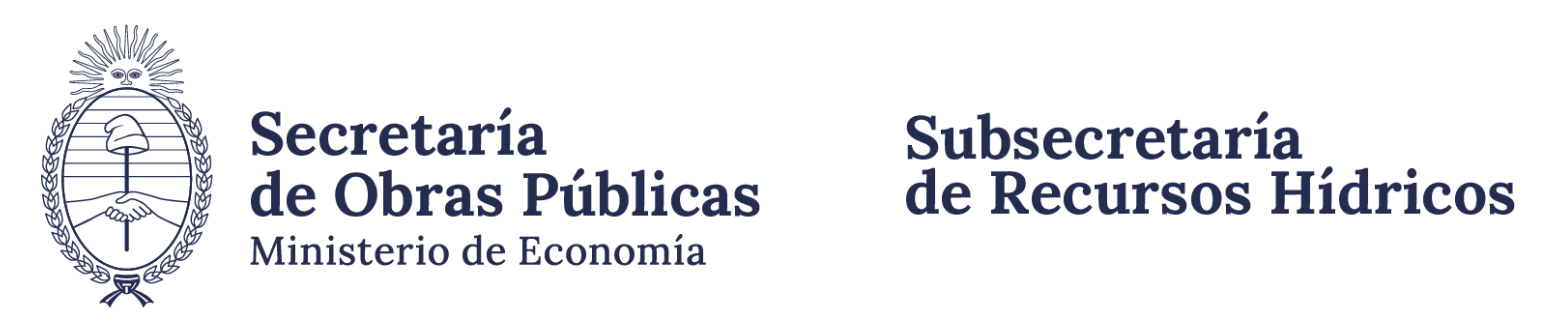

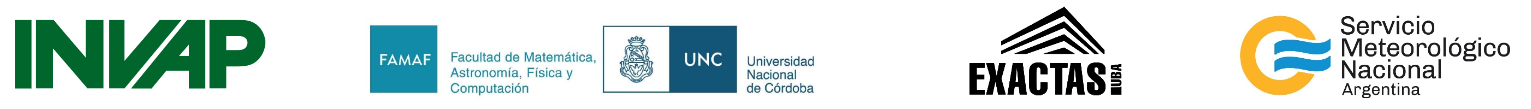